In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from useful_scit.imps import *
import check_input_01_funs as pp
from check_input_01_funs import *

In [4]:
path = '/Volumes/mbProD/Downloads/wrf_small_files'

In [5]:
glob.glob(path+'/wrf*')

['/Volumes/mbProD/Downloads/wrf_small_files/wrfbdy_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrffdda_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrfinput_d01',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrflowinp_d01']

In [9]:
file_path = os.path.join(path,'wrflowinp_d01')

In [11]:
xa = xr.open_dataset(file_path)

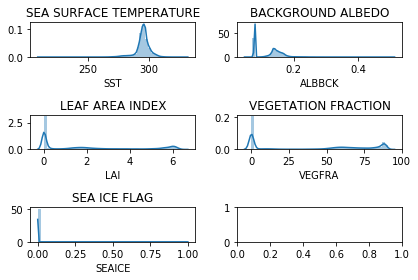

In [10]:
plot_lowinp_pars(xa)

SST show issues:
- min<220 K 
- max>320 K

In [374]:
file_input = os.path.join(path,'wrfinput_d01')
xa_low = import_lowinp(file_path,file_input)

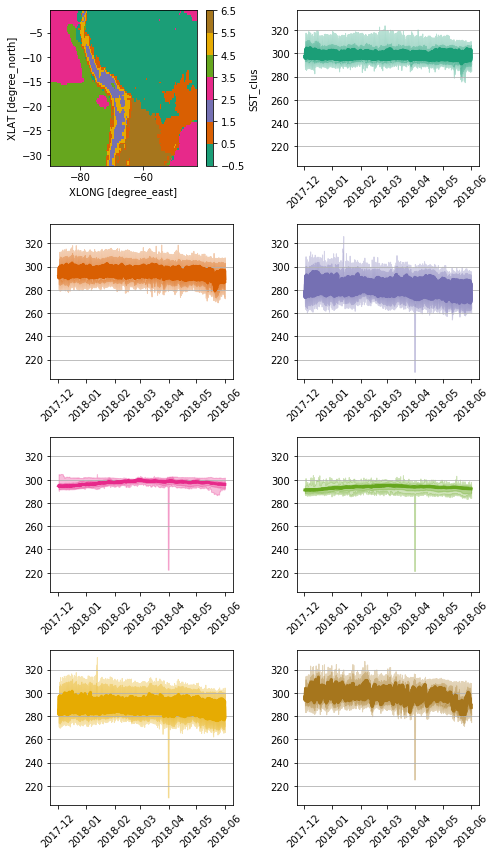

In [375]:
p = 'SST'
p_c = p+'_clus'
nc = 7
cols = 2
plot_clus_sig(xa_low,p,p_c,nc,cols=2)

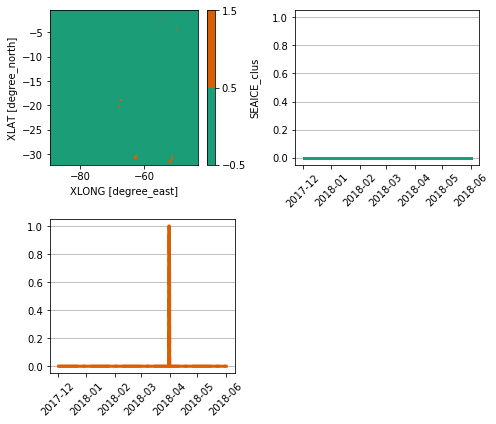

In [363]:
p = 'SEAICE'
p_c = p+'_clus'
nc = 2
cols = 2
plot_clus_sig(xa_low,p,p_c,nc,cols=2)

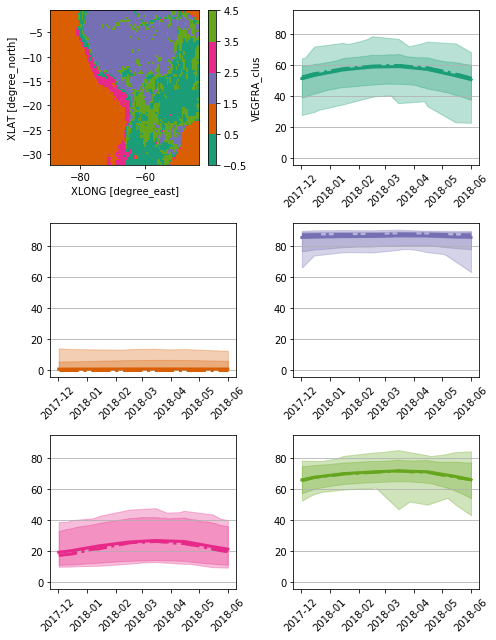

In [364]:
p = 'VEGFRA'
p_c = p+'_clus'
nc = 5
cols = 2
plot_clus_sig(xa_low,p,p_c,nc,cols=2)

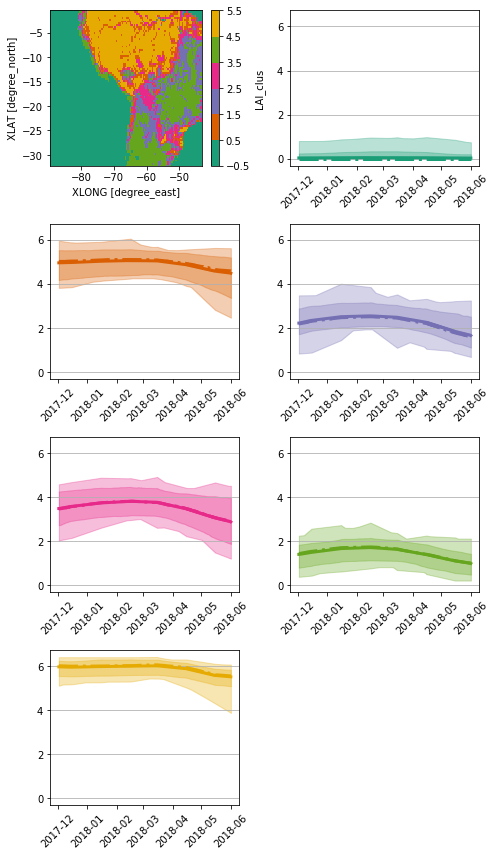

In [366]:
p = 'LAI'
p_c = p+'_clus'
nc = 6
cols = 2
plot_clus_sig(xa_low,p,p_c,nc,cols=2)

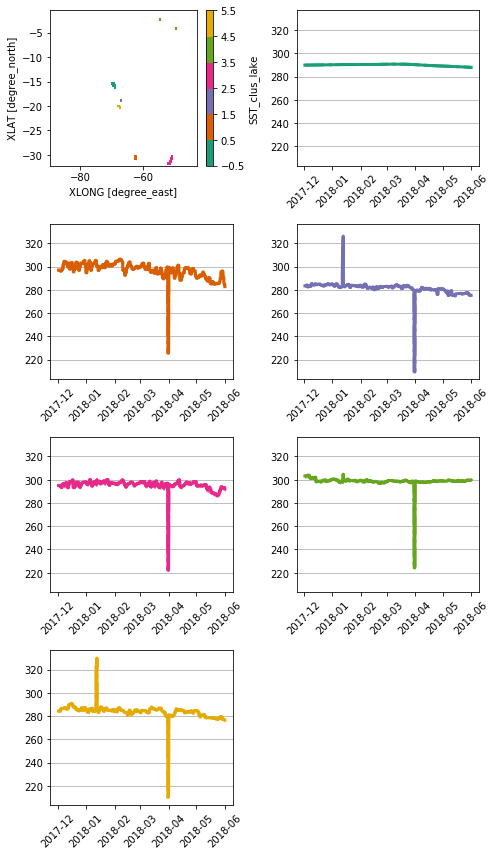

In [367]:
x1 = xa_low.where(xa_low.LAKEMASK==1)
p = 'SST'
nc = 6
p_c = p+'_clus_lake'
cols = 2
plot_clus_sig(x1,p,p_c,nc,cols=2)

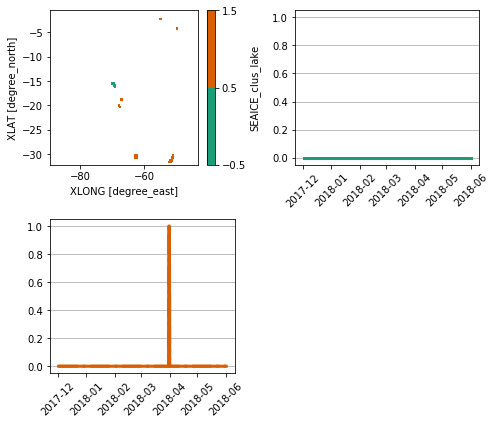

In [369]:
x1 = xa_low.where(xa_low.LAKEMASK==1)
p = 'SEAICE'
nc = 2
p_c = p+'_clus_lake'
cols = 2
plot_clus_sig(x1,p,p_c,nc,cols=2)

In [12]:
xaIce = xa.where(xa.SEAICE==1)

/Users/diego/miniconda3/envs/test/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


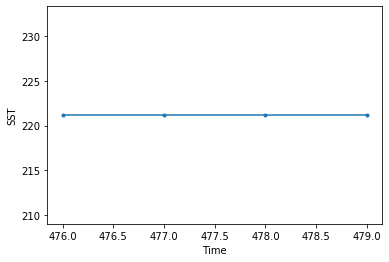

In [13]:
xaIce.SST.mean(dim=['west_east','south_north']).plot(marker='.')

In [52]:
xaC = xa.copy()

In [53]:
xr.set_options(keep_attrs=True)

In [54]:
xaC['SST']=xaC.SST.where(xa.SEAICE==0)

In [55]:
xaC['SST']

<xarray.DataArray 'SST' (Time: 725, south_north: 85, west_east: 117)>
array([[[290.7168 , 290.63303, ..., 292.92447, 293.31033],
        [290.93988, 290.83624, ..., 293.32108, 293.81616],
        ...,
        [295.7321 , 296.01614, ..., 301.06223, 301.07645],
        [296.25864, 296.5269 , ..., 301.08105, 301.13306]],

       [[290.70956, 290.63132, ..., 292.8304 , 293.1987 ],
        [290.9047 , 290.8022 , ..., 293.22098, 293.70303],
        ...,
        [295.62616, 295.91956, ..., 301.00375, 301.0295 ],
        [296.1137 , 296.39352, ..., 301.03336, 301.0952 ]],

       ...,

       [[291.8032 , 291.84607, ..., 294.51752, 294.2531 ],
        [291.98694, 292.02744, ..., 294.7497 , 294.49847],
        ...,
        [296.00842, 295.91135, ..., 301.3926 , 301.3287 ],
        [295.94052, 295.8807 , ..., 301.38248, 301.3628 ]],

       [[291.81805, 291.85162, ..., 294.44586, 294.182  ],
        [291.99997, 292.03146, ..., 294.68658, 294.43097],
        ...,
        [296.06204, 295.98264, ..

In [56]:
xaC['SST']=xaC.SST.interpolate_na(dim='Time',method='linear')

In [57]:
xaC.SST.attrs = xa.SST.attrs

(array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 28., 24.]),
 array([279.3039 , 281.34805, 283.3922 , 285.43637, 287.48053, 289.52466,
        291.56882, 293.61298, 295.65714, 297.7013 , 299.74545],
       dtype=float32),
 <a list of 10 Patch objects>)

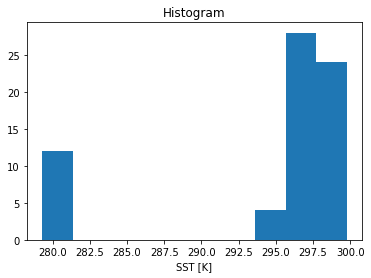

In [58]:
xaC.SST.where(xa.SEAICE==1).plot()

(array([12.,  0.,  0.,  0.,  0.,  0.,  0., 20., 16., 20.]),
 array([209.48886, 211.11589, 212.74292, 214.36993, 215.99696, 217.624  ,
        219.25102, 220.87805, 222.50507, 224.1321 , 225.75912],
       dtype=float32),
 <a list of 10 Patch objects>)

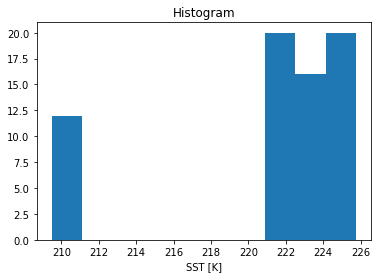

In [59]:
xa.SST.where(xa.SEAICE==1).plot()

In [106]:
xaC['SST']=xaC.SST.where((xaC.SST<310) & (xa_low.LAKEMASK==0)).interpolate_na(dim='Time',method='linear')

<xarray.Dataset>
Dimensions:      (Time: 725, south_north: 85, west_east: 117)
Coordinates:
  * south_north  (south_north) int64 0 1 2 3 4 5 6 7 ... 77 78 79 80 81 82 83 84
  * west_east    (west_east) int64 0 1 2 3 4 5 6 ... 110 111 112 113 114 115 116
    XLONG        (south_north, west_east) float32 ...
    XLAT         (south_north, west_east) float32 ...
Dimensions without coordinates: Time
Data variables:
    Times        (Time) |S19 ...
    SEAICE       (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    VEGFRA       (Time, south_north, west_east) float32 ...
    UOCE         (Time, south_north, west_east) float32 ...
    VOCE         (Time, south_north, west_east) float32 ...
    LAI          (Time, south_north, west_east) float32 ...
    ALBBCK       (Time, south_north, west_east) float32 ...
    SST          (Time, south_north, west_east) float32 290.7168 ... 301.26044
Attributes:
    TITLE:                            OUTPUT FROM REAL_EM V4.0.3 PREPROCESSOR
   

In [110]:
xaC.to_netcdf('/tmp/xa3')
# xaC.to_netcdf('/tmp/xa1')

ValueError: cannot serialize coordinates because variable SEAICE already has an attribute 'coordinates'

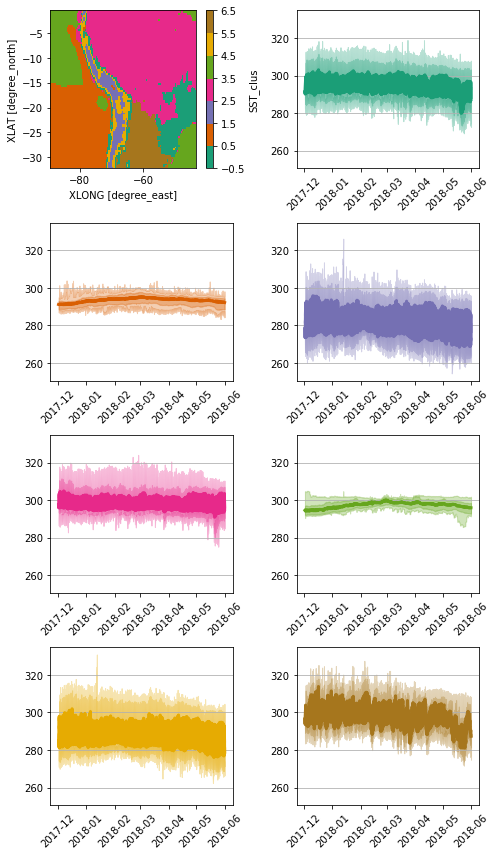

In [82]:
file_input = os.path.join(path,'wrfinput_d01')
xa_low = import_lowinp('/tmp/xa1',file_input)
p = 'SST'
p_c = p+'_clus'
nc = 7
cols = 2
plot_clus_sig(xa_low,p,p_c,nc,cols=2)

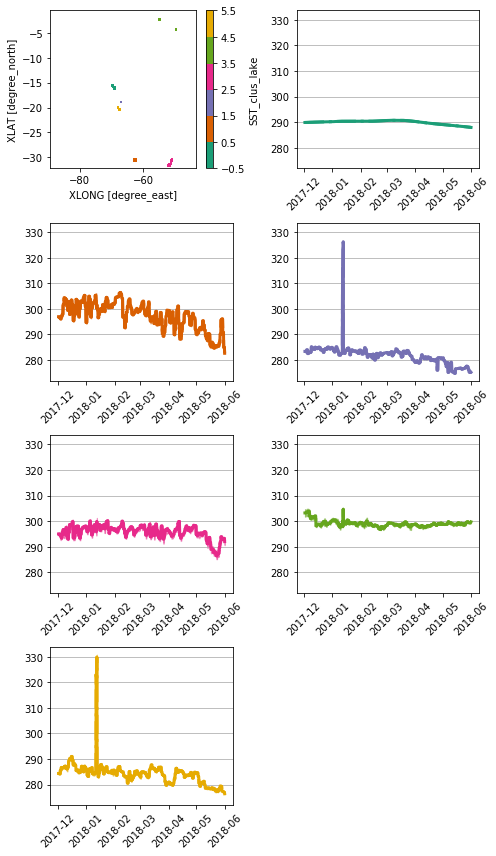

In [83]:
x1 = xa_low.where(xa_low.LAKEMASK==1)
p = 'SST'
nc = 6
p_c = p+'_clus_lake'
cols = 2
plot_clus_sig(x1,p,p_c,nc,cols=2)

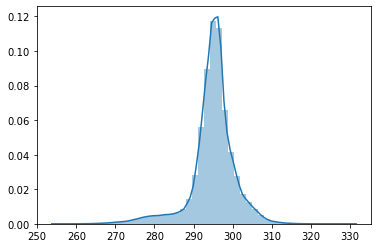

In [67]:
sns.distplot(xaC.SST.values.flatten())

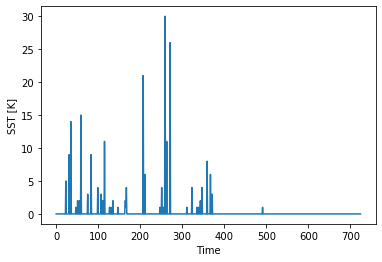

In [77]:
xaC.SST.where(xaC.SST>320).count(dim=['south_north','west_east']).plot()

In [51]:
xaC['SST']=xaC.SST.where(xaC.SST<=328).interpolate_na(dim='Time',method='linear')
xaC.SST.attrs = xa.SST.attrs

In [49]:
xaC.to_netcdf('/tmp/xa',format='NETCDF4')

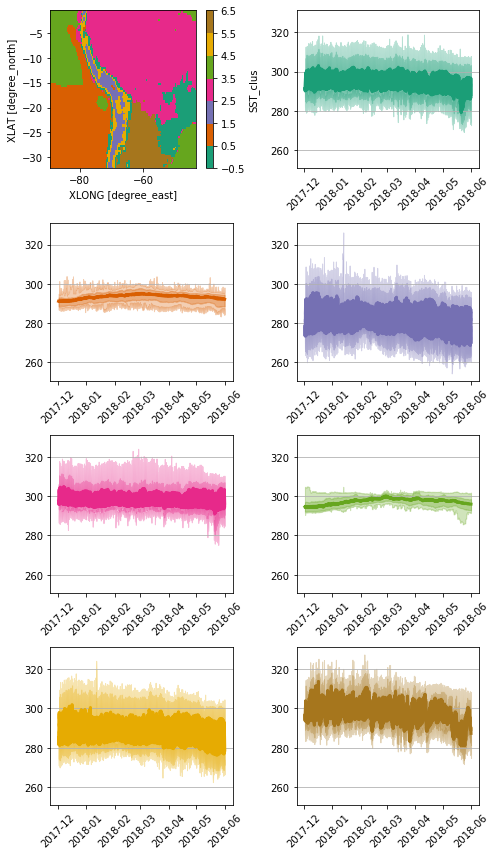

In [50]:
file_input = os.path.join(path,'wrfinput_d01')
xa_low = import_lowinp('/tmp/xa',file_input)
p = 'SST'
p_c = p+'_clus'
nc = 7
cols = 2
plot_clus_sig(xa_low,p,p_c,nc,cols=2)